In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df_customers=pd.read_excel('CustomersData.xlsx')

print(df_customers.describe())
df_customers.sort_values(by='Tenure_Months',ascending=True)

         CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.959667
min    12346.000000       2.000000
25%    13830.500000      14.000000
50%    15300.000000      26.000000
75%    16882.250000      38.000000
max    18283.000000      50.000000


,CustomerID,Gender,Location,Tenure_Months
694,15361,M,New York,2
83,16539,M,California,2
70,12472,F,New Jersey,2
971,14653,M,California,2
962,17389,F,New York,2
...,...,...,...,...
598,16579,M,California,50
766,15392,M,California,50
1412,14188,F,California,50
691,13198,M,California,50


In [5]:
df_online_sales=pd.read_csv('Online_Sales.csv')
df_online_sales['Txn_Dt']=pd.to_datetime(df_online_sales['Transaction_Date'])
df_online_sales['Txn_Month']=df_online_sales['Txn_Dt'].dt.to_period('M')
df_online_sales['Sales_Total'] = df_online_sales['Quantity']*df_online_sales['Avg_Price']+df_online_sales['Delivery_Charges']
df_online_sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Txn_Dt,Txn_Month,Sales_Total
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01-01,2019-01,160.21
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01-01,2019-01,160.21
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,2019-01-01,2019-01,8.55
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,2019-01-01,2019-01,94.15
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,2019-01-01,2019-01,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,2019-12-31,2019-12,127.80
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,2019-12-31,2019-12,55.42
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,2019-12-31,2019-12,158.38
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,2019-12-31,2019-12,409.10


In [6]:
df_online_sales[df_online_sales['Product_Description'] == 'Google 22 oz Water Bottle'].head(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Txn_Dt,Txn_Month,Sales_Total
6,17850,16682,1/1/2019,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.50,Not Used,2019-01-01,2019-01,52.70
247,13705,16852,1/3/2019,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,2,2.47,6.50,Clicked,2019-01-03,2019-01,11.44
306,13448,16894,1/3/2019,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,10,2.47,18.47,Clicked,2019-01-03,2019-01,43.17
307,13448,16894,1/3/2019,GGOEGDHR018499,Google 22 oz Water Bottle,Drinkware,15,2.47,18.47,Clicked,2019-01-03,2019-01,55.52
699,16583,17167,1/5/2019,GGOEGDHR018499,Google 22 oz Water Bottle,Drinkware,2,3.08,6.50,Clicked,2019-01-05,2019-01,12.66


### Q1) ***Identify the months with the highest and lowest acquisition rates.***



In [52]:
# Find the first month each customer appeared
df_first_purchase = df_online_sales.groupby('CustomerID')['Txn_Month'].min().reset_index()
#print(df_first_purchase)
df_first_purchase.columns = ['CustomerID', 'First_Month']

# Count how many customers first appeared in each month
df_new_customers_per_month = df_first_purchase.groupby('First_Month').size().reset_index(name='New_Customers')
#print(df_new_customers_per_month)
df_result_min_max = pd.concat([
    df_new_customers_per_month.nlargest(1, 'New_Customers'),
    df_new_customers_per_month.nsmallest(1, 'New_Customers')
])
print("")

print("Months with Highest and Lowest acquisition rates.")
df_result_min_max



Months with Highest and Lowest acquisition rates.


,First_Month,New_Customers
0,2019-01,215
10,2019-11,68


### ***What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?***

Re-engagement campaigns or discount coupons can be provided to ensure consistent growth throughout the year

### Q2) ***Analyze the data to determine if certain months consistently show higher or lower acquisition rates.***



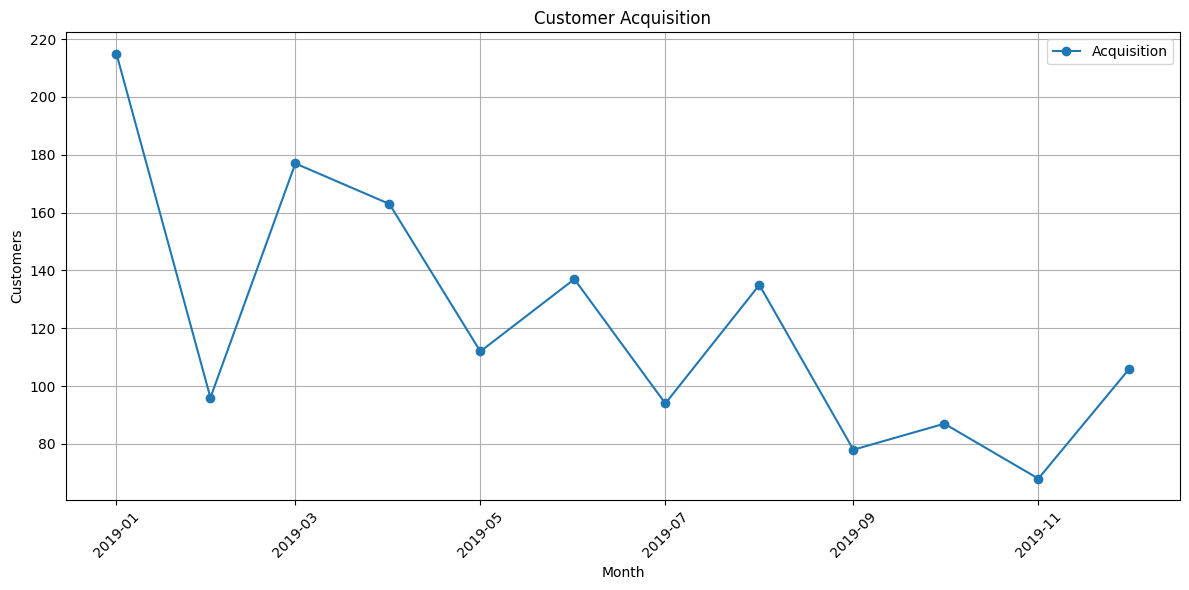

In [53]:

plt.figure(figsize=(12,6))
plt.plot(df_new_customers_per_month['First_Month'].dt.to_timestamp(), df_new_customers_per_month['New_Customers'], label='Acquisition', marker='o')
plt.title('Customer Acquisition')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*It is hard to get a specific trend on customer acquisition on a month bassis as the data is only for 1 year. But the overall trend is falling, so the customer acquisition is falling from Jan to Dec, but have spikes every alternate month or after 2 months.*




### ***How can the company capitalize on high-performing months and improve performance during slower periods?***

Following are some of the steps which can be undertaken:
* 1) Increase ad spend on high-performing channels during these months.
* 2) Offer discount vouchers or loyalty points redeemable in future (slower) months.



### Q3) ***Identify periods with the strongest and weakest retention rates.***



In [54]:
# Get unique CustomerID-Month combinations
df_customer_monthly = df_online_sales[['CustomerID', 'Txn_Month']].drop_duplicates()

# Sort by month
months_sorted = sorted(df_customer_monthly['Txn_Month'].unique())

# Prepare result container
retention_data = []

for i in range(len(months_sorted) - 1):

    month_current = months_sorted[i]
    month_next = months_sorted[i + 1]

    customers_current = set(df_customer_monthly[df_customer_monthly['Txn_Month'] == month_current]['CustomerID'])
    customers_next = set(df_customer_monthly[df_customer_monthly['Txn_Month'] == month_next]['CustomerID'])
    retained_customers = customers_current & customers_next  # intersection
    retention_rate = len(retained_customers) / len(customers_current) if customers_current else 0

    retention_data.append({
        'Month': month_next.strftime('%Y-%m'),
        'Total_Customers': len(customers_next),
        'Month_On_Month_Retained_Customers': len(retained_customers),
        'Retention_Rate': round(retention_rate, 4)
    })

# Convert to DataFrame
df_retention = pd.DataFrame(retention_data)

#print(df_retention)

df_result_min_max_retension = pd.concat([
    df_retention.nlargest(1, 'Retention_Rate'),
    df_retention.nsmallest(1, 'Retention_Rate')
])
print("")

print("Months with Highest and Lowest retention rates.")
df_result_min_max_retension



Months with Highest and Lowest retention rates.


,Month,Total_Customers,Month_On_Month_Retained_Customers,Retention_Rate
6,2019-08,300,65,0.2754
0,2019-02,109,13,0.0605


### ***What strategies could be implemented to improve retention during weaker months?***
* 1) Promote bundled products with slight discounts to increase order size
* 2) Run referral programs where current customers get rewards for bringing new users.

### Q4) ***Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.***


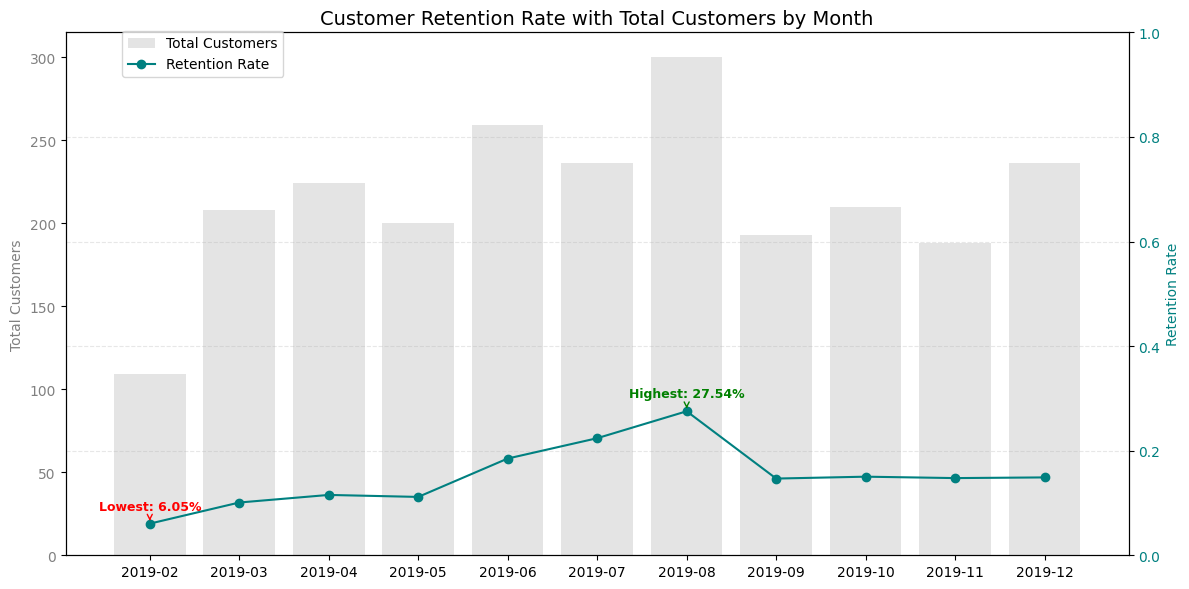

In [10]:

# Find min and max retention months
min_row = df_retention.loc[df_retention['Retention_Rate'].idxmin()]
max_row = df_retention.loc[df_retention['Retention_Rate'].idxmax()]

# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Total Customers
ax1.bar(df_retention['Month'], df_retention['Total_Customers'], color='lightgray', alpha=0.6, label='Total Customers')
ax1.set_ylabel('Total Customers', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Secondary axis for retention rate
ax2 = ax1.twinx()
ax2.plot(df_retention['Month'], df_retention['Retention_Rate'], marker='o', color='teal', label='Retention Rate')
ax2.set_ylabel('Retention Rate', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')
ax2.set_ylim(0, 1)

# Annotate min and max
for row, color, label in zip([min_row, max_row], ['red', 'green'], ['Lowest', 'Highest']):
    ax2.annotate(f'{label}: {row["Retention_Rate"]:.2%}',
                 xy=(row['Month'], row['Retention_Rate']),
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 color=color,
                 fontsize=9,
                 fontweight='bold',
                 arrowprops=dict(arrowstyle='->', color=color))

# Final formatting
plt.title('Customer Retention Rate with Total Customers by Month', fontsize=14)
fig.tight_layout()
plt.xticks(rotation=45)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.3)
plt.show()


Following steps can be taken to replicate high-retention months success throughout the year.

* 1) Incentivize customers to make a second purchase within 30 days (e.g., with time-bound coupons).
* 2) Loyalty tiers that unlock perks across the year.

### Q5) ***Compare the revenue generated by new and existing customers month-over-month.***



In [11]:
df_sales_new_customer = pd.merge(df_online_sales,
                                 df_first_purchase,
                                 left_on='CustomerID',
                                 right_on='CustomerID',
                                 how='inner' )
df_sales_new_customer['Existing_Customer'] = df_sales_new_customer['First_Month'].dt.to_timestamp() < df_sales_new_customer['Txn_Month'].dt.to_timestamp()

df_sales_new_customer_2 = df_sales_new_customer.groupby(['Txn_Month','Existing_Customer'])['Sales_Total'].agg({'sum'}).reset_index()

pivot_df = df_sales_new_customer_2.pivot(index='Txn_Month', columns='Existing_Customer', values='sum')
pivot_df.columns = ['New_Customers', 'Existing_Customers']  # False = New, True = Existing
pivot_df = pivot_df[['New_Customers', 'Existing_Customers']]
pivot_df

,New_Customers,Existing_Customers
Txn_Month,,
2019-01,462866.90,NaN
2019-02,314764.37,45272.03
2019-03,342113.64,68294.39
2019-04,261939.49,181160.67
2019-05,223157.62,126001.97
2019-06,213946.91,144648.05
2019-07,168033.12,253328.88
2019-08,220855.86,241454.08
2019-09,164597.74,236956.08


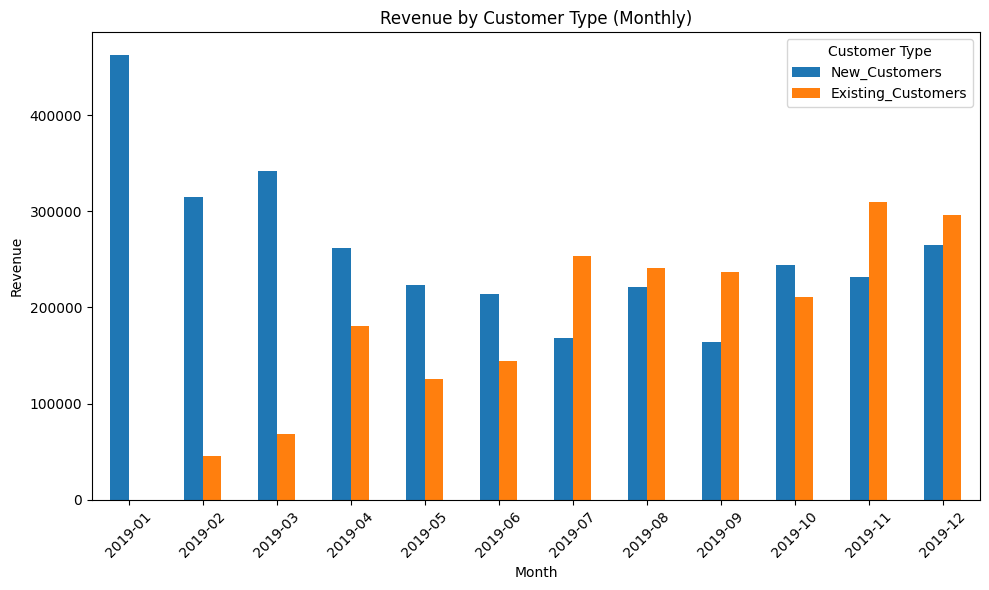

In [12]:
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title("Revenue by Customer Type (Monthly)")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.tight_layout()
plt.show()

### ***What does this trend suggest about the balance between acquisition and retention efforts?***

The plot clearly shows that the over a period of time the Total Revenue earned from Existing Customers start matching the Revenue from New Customers and then even surpassing that. This clearly indicates the Existing Customers to have affinity to keep buying from the company over a longer period of time.

### Q6) ***Analyze the relationship between coupon usage and revenue generation***




In [55]:
df_revenue_by_coupon_usage=df_online_sales.groupby(by=df_online_sales['Coupon_Status'])['Sales_Total'].sum().reset_index()
df_revenue_by_coupon_usage

,Coupon_Status,Sales_Total
0,Clicked,2662820.28
1,Not Used,816306.71
2,Used,1748302.70


Revenue generation seems to be directly related to Coupon usage. Even when Coupon is Clicked we can see the revenues are higher showing direct co-relation between coupon and revenue

### ***How can discount strategies be optimized to maximize revenue while maintaining profitability?***

Following are some of the tactics:
* 1) Bundling: Combine high- and low-margin items to protect profitability.
* 2) Avoid discounting bestsellers that sell well without incentives.
* 3) Use dynamic rules to trigger discounts based on user behavior

### Q7) ***Identify the top-performing products and analyze the factors driving their success.***


In [14]:
top_products_by_qty=df_online_sales.groupby(by=df_online_sales['Product_Description']).agg({
    'Quantity': 'sum',      # Sum of sales
    'Avg_Price': 'mean'   # Average (mean) of quantity
    }).sort_values(by='Quantity',ascending=False).reset_index()
top_products_by_qty


,Product_Description,Quantity,Avg_Price
0,Maze Pen,16234,0.914733
1,Google 22 oz Water Bottle,14282,2.698592
2,Google Sunglasses,11452,3.086415
3,Sport Bag,7321,4.431446
4,Google Metallic Notebook Set,6496,5.290741
...,...,...,...
399,Android 5-Panel Low Cap,3,22.390000
400,Google White Force 17 oz Bottle,3,24.450000
401,Google Women's Colorblock Tee White,1,27.990000
402,Compact Journal with Recycled Pages,1,3.500000


"Maze Pen","Google 22 oz Water Bottle" & "Google Sunglasses	" are the top 3 selling items by quantity.

### ***How can this insight inform inventory management and promotional strategies?***

The data shows the Low/Avg priced items are generally in high demand in terms of quantity, so the inventory management team needs to always be ready to fill the demand.

More promotional activities can be taken on High priced items to increase their sales.

### Q8) ***Analyze the relationship between monthly marketing spend and revenue.***


In [56]:
mkt_spend=pd.read_csv('Marketing_Spend.csv')
mkt_spend['Spend_Dt']=pd.to_datetime(mkt_spend['Date'])
mkt_spend['Spend_Month']=mkt_spend['Spend_Dt'].dt.to_period('M')

#print(mkt_spend.describe())

mkt_spend_monthly = mkt_spend.groupby(by=mkt_spend['Spend_Month'])[['Offline_Spend','Online_Spend']].sum().reset_index()
#print(mkt_spend_monthly)

online_sales_monthly = df_online_sales.groupby(by=df_online_sales['Txn_Month'])['Sales_Total'].sum().reset_index()
online_sales_monthly

,Txn_Month,Sales_Total
0,2019-01,462866.90
1,2019-02,360036.40
2,2019-03,410408.03
3,2019-04,443100.16
4,2019-05,349159.59
5,2019-06,358594.96
6,2019-07,421362.00
7,2019-08,462309.94
8,2019-09,401553.82
9,2019-10,455643.16


In [16]:
combined_df = pd.merge(
    mkt_spend_monthly,
    online_sales_monthly,
    left_on='Spend_Month',
    right_on='Txn_Month',
    how='inner'
)

# Drop redundant Txn_Month column if needed
combined_df = combined_df.drop(columns=['Txn_Month'])
combined_df['ROI'] = combined_df['Sales_Total'] / (combined_df['Offline_Spend'] + combined_df['Online_Spend'])
combined_df


,Spend_Month,Offline_Spend,Online_Spend,Sales_Total,ROI
0,2019-01,96600,58328.95,462866.90,2.987608
1,2019-02,81300,55807.92,360036.40,2.625934
2,2019-03,73500,48750.09,410408.03,3.357118
3,2019-04,96000,61026.83,443100.16,2.821812
4,2019-05,65500,52759.64,349159.59,2.952483
5,2019-06,80500,53818.14,358594.96,2.669743
6,2019-07,67500,52717.85,421362.00,3.504987
7,2019-08,85500,57404.15,462309.94,3.235105
8,2019-09,83000,52514.54,401553.82,2.963179
9,2019-10,93500,57724.65,455643.16,3.013022


### ***Are there any months where marketing efforts yielded disproportionately high or low returns?***

Marketing efforts look consistent mostly throughout the year except Month of Feb and June where the ROI seems to be quite low and in Jul when the ROI is highest.

### ***How can marketing strategies be adjusted to improve ROI?***

Following steps can be untertaken:
* Deliver dynamic content, product recommendations, and email journeys based on user preferences and actions, increasing engagement and conversions.
* Align messaging with the customer’s journey, nurturing leads and maximizing customer lifetime value

### Q9) ***Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated.***


   Spend_Month  Offline_Spend  Online_Spend  Sales_Total       ROI  \
0   2019-01-01          96600      58328.95    462866.90  2.987608   
1   2019-02-01          81300      55807.92    360036.40  2.625934   
2   2019-03-01          73500      48750.09    410408.03  3.357118   
3   2019-04-01          96000      61026.83    443100.16  2.821812   
4   2019-05-01          65500      52759.64    349159.59  2.952483   
5   2019-06-01          80500      53818.14    358594.96  2.669743   
6   2019-07-01          67500      52717.85    421362.00  3.504987   
7   2019-08-01          85500      57404.15    462309.94  3.235105   
8   2019-09-01          83000      52514.54    401553.82  2.963179   
9   2019-10-01          93500      57724.65    455643.16  3.013022   
10  2019-11-01          93000      68144.96    541254.55  3.358805   
11  2019-12-01         122000      76648.75    561140.18  2.824786   

    Total_Spend  
0     154928.95  
1     137107.92  
2     122250.09  
3     157026.83  

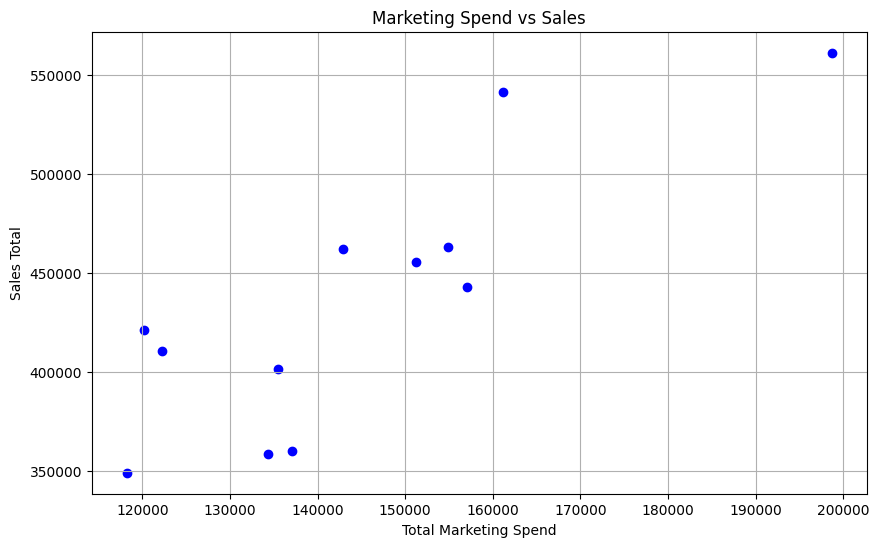

In [58]:
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame with 'Total_Spend' and 'Sales_Total' columns
combined_df['Total_Spend'] = combined_df['Offline_Spend'] + combined_df['Online_Spend']
print(combined_df)

plt.figure(figsize=(10,6))
plt.scatter(combined_df['Total_Spend'], combined_df['Sales_Total'], color='blue')
plt.title('Marketing Spend vs Sales')
plt.xlabel('Total Marketing Spend')
plt.ylabel('Sales Total')
plt.grid(True)
plt.show()


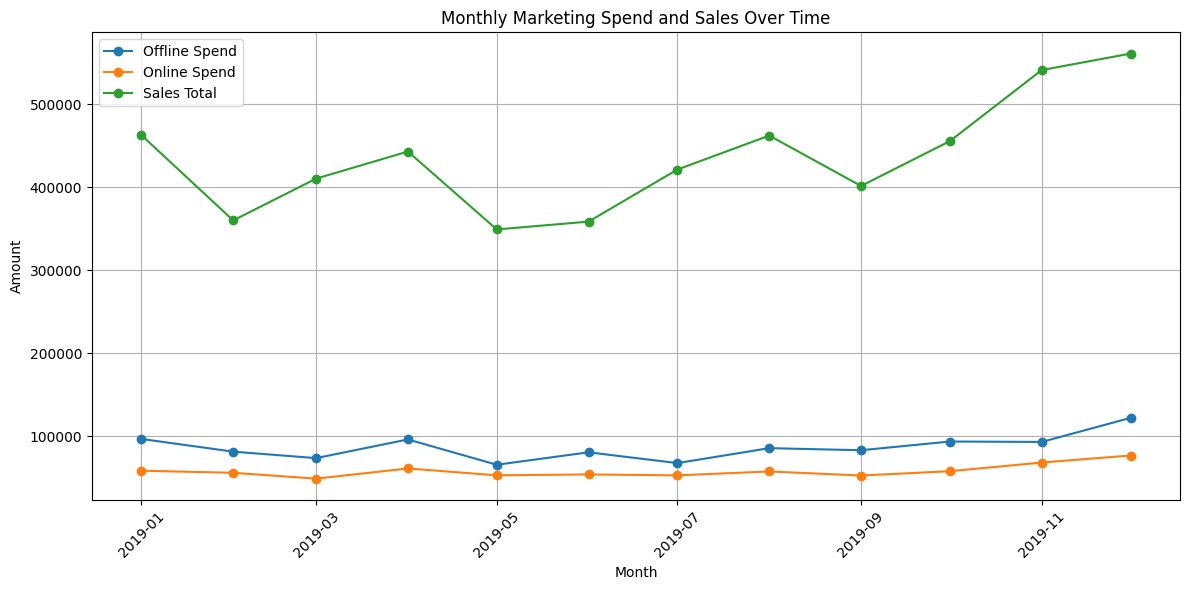

In [18]:
combined_df['Spend_Month'] = combined_df['Spend_Month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(combined_df['Spend_Month'], combined_df['Offline_Spend'], label='Offline Spend', marker='o')
plt.plot(combined_df['Spend_Month'], combined_df['Online_Spend'], label='Online Spend', marker='o')
plt.plot(combined_df['Spend_Month'], combined_df['Sales_Total'], label='Sales Total', marker='o')
plt.title('Monthly Marketing Spend and Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### ***Are there opportunities to reallocate resources for better results?***

The month of Jul has the Highest ROI and we can see the Offline and Online marketing spends are quite proportionate. The company can maintain that balance to maximize the ROI.

### Q10) ***Segment customers into groups such as Premium, Gold, Silver, and Standard.***


In [19]:
reference_date = df_online_sales['Txn_Dt'].max() + pd.Timedelta(days=1)

# Group by customer and compute RFM values
rfm = df_online_sales.groupby('CustomerID').agg({
    'Txn_Dt': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'nunique',  # Frequency
    'Sales_Total': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), q=4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4])

# Combine into a single RFM score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [20]:
def segment_customer(row):
    score = row['RFM_Score']
    if score >= '444':
        return 'Premium'
    elif score >= '344':
        return 'Gold'
    elif score >= '233':
        return 'Silver'
    else:
        return 'Standard'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

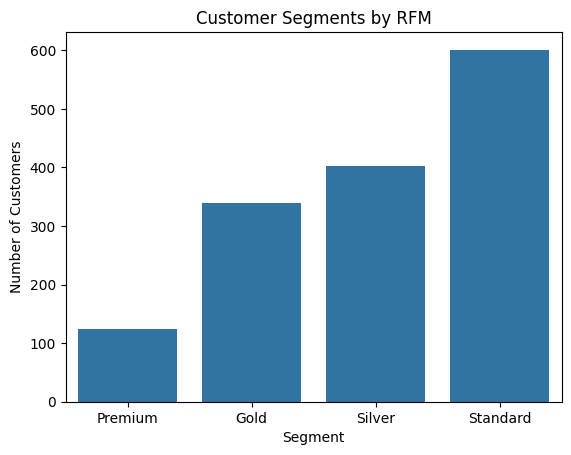

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Segment', data=rfm, order=['Premium', 'Gold', 'Silver', 'Standard'])
plt.title("Customer Segments by RFM")
plt.ylabel("Number of Customers")
plt.show()


* ### ***What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)***

* ### Premium Customers (High R, High F, High M):
  * Loyalty Rewards: Offer VIP or tiered loyalty programs
  * Upsell & Bundle: Suggest premium bundles or upgrades they’re more likely to consider.

* ### Gold Customers (Moderate R, High F & M):
  * Feedback Loop: Ask why they've been inactive — survey for insights and improve
  * Referral Programs: Encourage them to bring others like them.

* ### Silver Customers (High R, Low/Moderate F & M):
  * First-Time Discount: Offer a second-purchase incentive to drive habit formation.
  * Social Proof: Showcase testimonials and top-rated products.
  * Product Discovery: Recommend products they haven’t tried yet to increase variety and value.

* ### Standard Customers (Low R, F, and M):
  * Reactivation Discounts: Use strong promotions or limited offers to re-engage.
  * Testing Ground: Test new marketing approaches or messaging here.
  * Engagement Campaigns: Share value-driven content (how-to guides, trends) to stay top-of-mind.

### Q11) ***Analyze the revenue contribution of each customer segment.***


In [22]:
# Group by customer segment and calculate total revenue and number of customers
revenue_by_segment = rfm.groupby('Segment').agg(
    Total_Revenue=('Monetary', 'sum'),
    Customer_Count=('CustomerID', 'count')
).reset_index()

# Calculate revenue share as a percentage
total_revenue = revenue_by_segment['Total_Revenue'].sum()
revenue_by_segment['Revenue_Share_%'] = (revenue_by_segment['Total_Revenue'] / total_revenue) * 100

# Sort by total revenue contribution
revenue_by_segment = revenue_by_segment.sort_values(by='Total_Revenue', ascending=False)

print(revenue_by_segment)

    Segment  Total_Revenue  Customer_Count  Revenue_Share_%
1   Premium     1549611.35             125        29.643849
0      Gold     1489032.45             340        28.484983
2    Silver     1107664.21             402        21.189462
3  Standard     1081121.68             601        20.681707


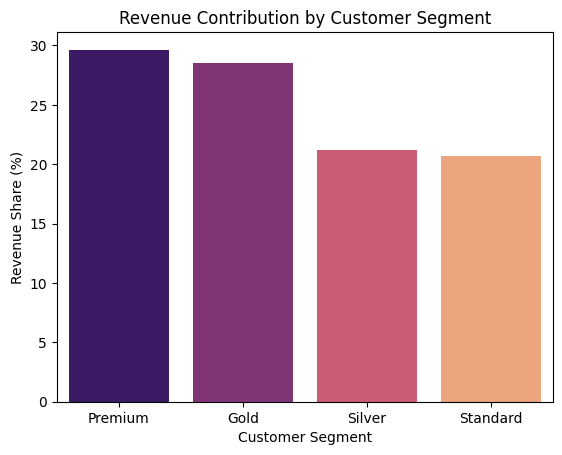

In [23]:
sns.barplot(data=revenue_by_segment, x='Segment', y='Revenue_Share_%', palette='magma', hue='Segment',legend=False )
plt.title("Revenue Contribution by Customer Segment")
plt.ylabel("Revenue Share (%)")
plt.xlabel("Customer Segment")
plt.show()

### ***How can the company focus its efforts on high-value segments while nurturing lower-value segments***

Following are some approaches which can be employed to achieve the above goals:

| Segment  | Goal                | Primary Tactics                                     |
| -------- | ------------------- | --------------------------------------------------- |
| Premium  | Retain & maximize   | Loyalty rewards, exclusives, early access, VIP care |
| Gold     | Reactivate & upsell | Personalized reminders, exclusive bundles           |
| Silver   | Convert to loyal    | Onboarding, 2nd-purchase discount, education        |
| Standard | Engage & qualify    | Basic offers, email nurturing, reactivation prompts |


### Q12) ***Group customers by their month of first purchase and analyze retention rates over time.***

In [61]:
# Find the first purchase month for each customer
df_online_sales['First_Purchase_Month'] = df_online_sales.groupby('CustomerID')['Txn_Month'].transform('min')

# Create a column for the period offset between transaction and first purchase (cohort index)
df_online_sales['Cohort_Index'] = (df_online_sales['Txn_Month'] - df_online_sales['First_Purchase_Month']).apply(lambda x: x.n)

# Pivot the data to get the retention matrix
cohort_data = df_online_sales.groupby(['First_Purchase_Month', 'Cohort_Index'])['CustomerID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='First_Purchase_Month', columns='Cohort_Index', values='CustomerID')

# Normalize to get retention rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention_rate = cohort_counts.divide(cohort_sizes, axis=0).round(4)

retention_rate.head(12)

Cohort_Index,0,1,2,3,4,5,6,7,8,9,10,11
First_Purchase_Month,,,,,,,,,,,,
2019-01,1.0,0.0605,0.1116,0.1581,0.1070,0.2047,0.1628,0.2186,0.1070,0.1302,0.0930,0.1581
2019-02,1.0,0.0729,0.0938,0.1667,0.1771,0.2292,0.1979,0.1562,0.1250,0.1146,0.1667,NaN
2019-03,1.0,0.1017,0.1977,0.1412,0.1808,0.1864,0.1243,0.1243,0.0847,0.1073,NaN,NaN
2019-04,1.0,0.0859,0.1472,0.1472,0.1104,0.0920,0.0613,0.0982,0.0736,NaN,NaN,NaN
2019-05,1.0,0.1071,0.0804,0.1161,0.0893,0.1161,0.1250,0.0714,NaN,NaN,NaN,NaN
2019-06,1.0,0.1460,0.1606,0.0876,0.0803,0.1022,0.0803,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.1383,0.0426,0.0638,0.1170,0.0957,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.1037,0.1111,0.0741,0.0593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.0769,0.0385,0.0256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


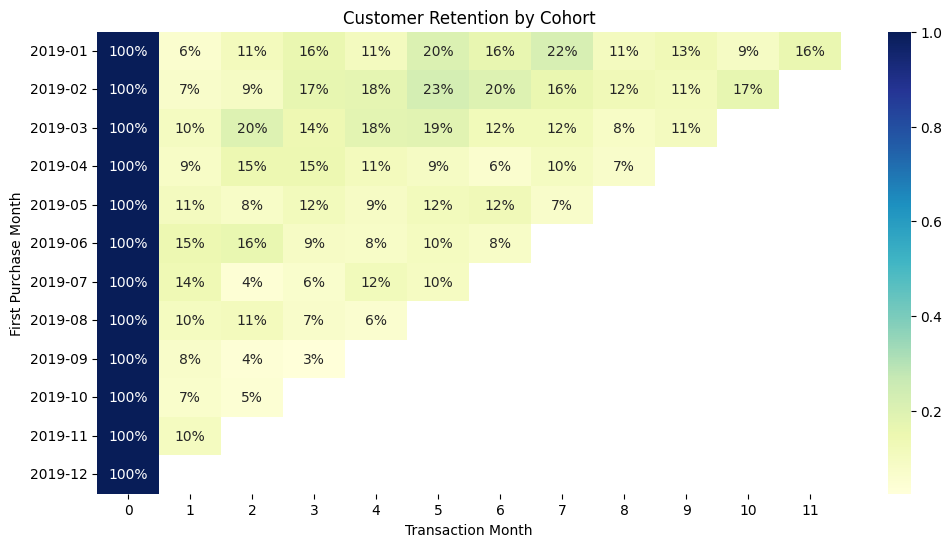

In [62]:

plt.figure(figsize=(12, 6))
sns.heatmap(retention_rate , annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Customer Retention by Cohort')
plt.ylabel('First Purchase Month')
plt.xlabel('Transaction Month')
plt.show()

### ***Which cohorts exhibit the highest and lowest retention rates?***

Stronger Cohorts:
* March 2019 (2019-03) and February 2019 (2019-02) cohorts show relatively higher retention in months 1–3.

Weaker Cohorts:
* January 2019 (2019-01) shows a sharp drop in month 1, with only ~6% retention.

Retention Trends:

* Retention typically drops significantly after the first month but some cohorts recover in later months, possibly due to seasonal promotions or re-engagement efforts.


### ***What strategies can be implemented to improve retention for weaker cohorts?***

The low retention could also be due to less data as the low retentions data could be due to lack of data over the next year.
But some of the following steps can be taken to improve retention for weaker cohort months

Early drop-offs indicate a poor post-purchase experience or lack of engagement.

Strategies:
* Post-Purchase Nurturing: Send follow-ups with product tips, user reviews, or how-to guides.
* Welcome Offers: Offer time-limited second-purchase discounts.
* Customer Support: Ensure prompt resolution of first-order issues.

### Q13) ***Analyze the lifetime value of customers acquired in different months.***


   First_Month  Sales_Total
0      2019-01   1171623.97
1      2019-02    615322.12
2      2019-03    754046.98
3      2019-04    498332.19
4      2019-05    373681.97
5      2019-06    326935.10
6      2019-07    264720.40
7      2019-08    292840.85
8      2019-09    170095.81
9      2019-10    257686.99
10     2019-11    236815.89
11     2019-12    265327.42


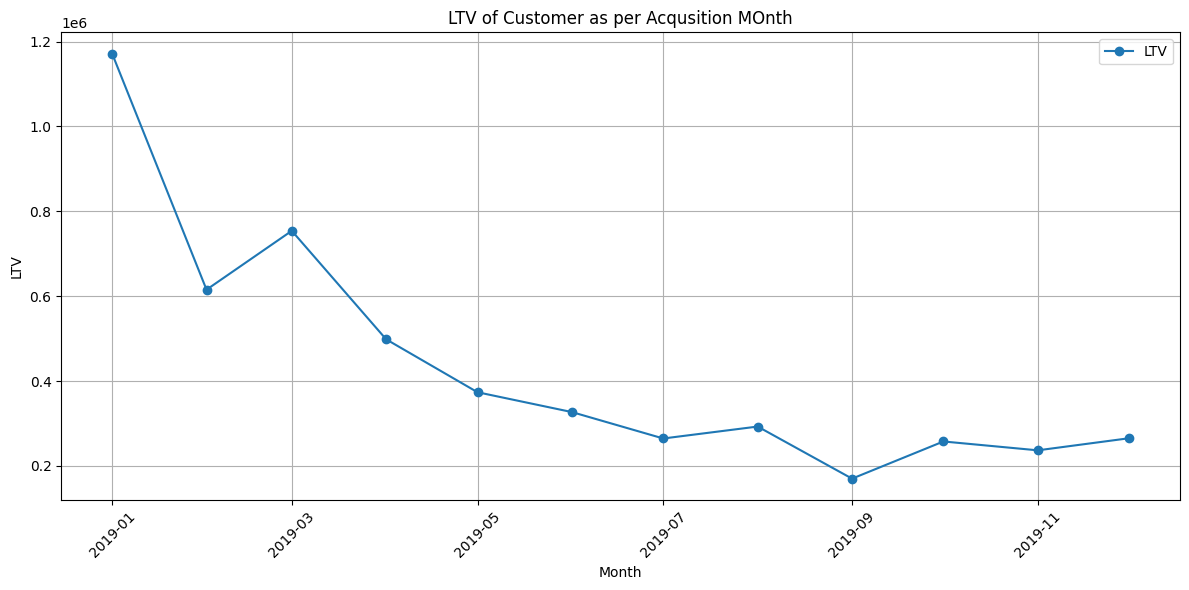

In [26]:
#print(df_first_purchase)

df_sales_per_customer =  df_online_sales.groupby(['CustomerID'])['Sales_Total'].sum().reset_index()
#print(df_sales_per_customer)

df_sales_customer_acq_month = pd.merge(df_sales_per_customer,
                                df_first_purchase,
                                left_on='CustomerID',
                                right_on='CustomerID',
                                how='inner')
df_ltv_acq_month = df_sales_customer_acq_month.groupby(['First_Month'])['Sales_Total'].sum().reset_index()
print(df_ltv_acq_month)
plt.figure(figsize=(12,6))
plt.plot(df_ltv_acq_month['First_Month'].dt.to_timestamp(), df_ltv_acq_month['Sales_Total'], label='LTV', marker='o')
plt.title('LTV of Customer as per Acqusition MOnth')
plt.xlabel('Month')
plt.ylabel('LTV')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***How can this insight inform acquisition and retention strategies?***

Since the data is of just 1 year it is quite obvious the LTV of Customers acquired in initial months are higher compared to later months. This is also visible in the graph.


### Q14) ***Do customers who use coupons have a different average transaction value compared to those who do not?***





In [27]:
#df_online_sales.to_csv('online_sales_total.csv', index=False)
df_sales_discount_coupon = df_online_sales.groupby(['Coupon_Status'])['Sales_Total'].agg({'sum','count'}).reset_index()

df_sales_discount_coupon = df_sales_discount_coupon.rename(columns={'sum':'Total_Sales_Value','count':'Count_Customer'})
df_sales_discount_coupon['Avg_Sales_Val_of_Customer']=df_sales_discount_coupon['Total_Sales_Value']/df_sales_discount_coupon['Count_Customer']
df_sales_discount_coupon

,Coupon_Status,Count_Customer,Total_Sales_Value,Avg_Sales_Val_of_Customer
0,Clicked,26926,2662820.28,98.894016
1,Not Used,8094,816306.71,100.853312
2,Used,17904,1748302.70,97.648721


Customers not using coupons have a slightly higher average transaction value, but the difference is small.

### ***Conduct a statistical test to validate this hypothesis.***


In [28]:
# mu1:mean sales value per customer for coupon used
# mu2:mean sales value per customer for coupon not used
# Null Hypothesis : H0 -> mu1 = mu2
# Alternate Hypothesis : Ha -> mu1 != mu2

from scipy.stats import ttest_ind

# Split data based on Coupon_Status
used = df_online_sales[df_online_sales['Coupon_Status'] == 'Used']['Sales_Total']
not_used = df_online_sales[df_online_sales['Coupon_Status'] == 'Not Used']['Sales_Total']

# Calculate basic statistics
avg_used = used.mean()
avg_not_used = not_used.mean()
std_used = used.std()
std_not_used = not_used.std()

# Two-Sample t-test
t_stat, p_val = ttest_ind(used, not_used, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")



T-statistic: -1.3652
P-value: 0.1722


Insight:
Since P-value > 0.05, we fail to reject the null hypothesis.
So the difference in average transaction values between users who used coupons and those who didn’t is not statistically significant.

### ***What implications does this have for the company’s discount and coupon strategies?***

Focus on Retention Over One-Off Incentives
Since coupons aren’t increasing spend, invest more in:

Loyalty programs

Personalized email journeys

Exclusive early access or rewards

### Q15) ***Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?***

### ***Test for differences in purchase behavior across locations, age groups, or delivery charge tiers.***





In [29]:
df_sales_by_cust_demographics=pd.merge(df_online_sales,
                                    df_customers, on='CustomerID', how='inner')
#print(df_sales_by_cust_demographics)

df_sales_by_loc = df_sales_by_cust_demographics.groupby('Location')['Sales_Total'].agg(['mean', 'count'])
print(df_sales_by_loc)
df_sales_by_gender = df_sales_by_cust_demographics.groupby('Gender')['Sales_Total'].agg(['mean', 'count'])
print(df_sales_by_gender)

                     mean  count
Location                        
California     100.111390  16136
Chicago         98.966910  18380
New Jersey     100.472594   4503
New York        94.563620  11173
Washington DC  103.965253   2732
             mean  count
Gender                  
F       98.570628  33007
M       99.106742  19917


* The Average Order value across locations is not much different it varies from USD 94.56 to USD 103.96. The count across locations is quite variable.
* The Average Order value across genders is also not much different though the count of orders is quite different.


In [30]:
# NULL Hypothesis : H0 : one group's mean order value does not differ much from the others.
# use ANOVA if you have more than 2 groups:
f_stat, p_val = stats.f_oneway(*(group['Sales_Total'].values for name, group in df_sales_by_cust_demographics.groupby('Location')))
print("F-statistic:", f_stat)
print()
print("P-value:", p_val)

F-statistic: 2.8361212203128505

P-value: 0.02296323645910237


The P-value < 0.05, so we cannot reject the Null Hypothesis

In [31]:
df_delivery_buckets = df_online_sales.groupby('Delivery_Charges')['Sales_Total'].agg(['mean', 'count'])
print(df_delivery_buckets)

                         mean  count
Delivery_Charges                    
0.00               120.661975    162
6.00                83.456471  26801
6.46                39.450000     14
6.48                21.142069     29
6.50               108.537783  15819
...                       ...    ...
354.00             697.070000      3
422.24            1075.097500      4
492.84             628.687000     10
504.00            1284.625000      2
521.36            2297.360000      1

[267 rows x 2 columns]


In [32]:
# Grouping by delivery charge buckets (creating categories)
bins = [0, 10, 20, 50, 100, 500]  # adjust ranges based on your data
labels = ['Free', 'Low', 'Medium', 'High', 'Very High']
df_online_sales['Delivery_Bucket'] = pd.cut(df_online_sales['Delivery_Charges'], bins=bins, labels=labels)

# Compute descriptive statistics by bucket:
bucket_stats = df_online_sales.groupby('Delivery_Bucket',observed=False)['Sales_Total'].agg(['mean', 'count']).reset_index()
print(bucket_stats)

# If comparing two groups, you might run a t-test:
low_bucket = df_online_sales[df_online_sales['Delivery_Bucket'] == 'Low']['Sales_Total']
high_bucket = df_online_sales[df_online_sales['Delivery_Bucket'] == 'High']['Sales_Total']
t_stat, p_value = stats.ttest_ind(low_bucket, high_bucket, equal_var=False)

print()
print("T-statistic:", t_stat)
print("P-value:", p_value)

  Delivery_Bucket        mean  count
0            Free   93.714753  43017
1             Low   97.751619   6379
2          Medium  114.802625   2175
3            High  186.273421    833
4       Very High  403.575352    355

T-statistic: -11.817568065446768
P-value: 4.583177656470111e-30


P-value suggests that Delivery Charges do, in fact, influence purchasing behavior.

* ### ***How can these insights inform personalized marketing and pricing strategies?***

* High delivery charges lead to a drop in order frequency and so the company should consider revising shipping pricing policy
* Female demographic group shows higher order frequency and even though not higher spending, the company can tailor promotions and exclusive deals to them on higher valued Product categories to get higher mean average order.

### Q16)***Does customer tenure impact purchase frequency?***


In [69]:
# Merge datasets on CustomerID
merged_df = pd.merge(df_online_sales, df_customers, on='CustomerID', how='inner')
#print(merged_df)

# Calculate purchase frequency per customer
purchase_freq = merged_df.groupby('CustomerID').agg({
    'Transaction_ID': 'count',
    'Tenure_Months': 'max'
}).rename(columns={
    'Transaction_ID': 'Purchase_Frequency'
}).reset_index()



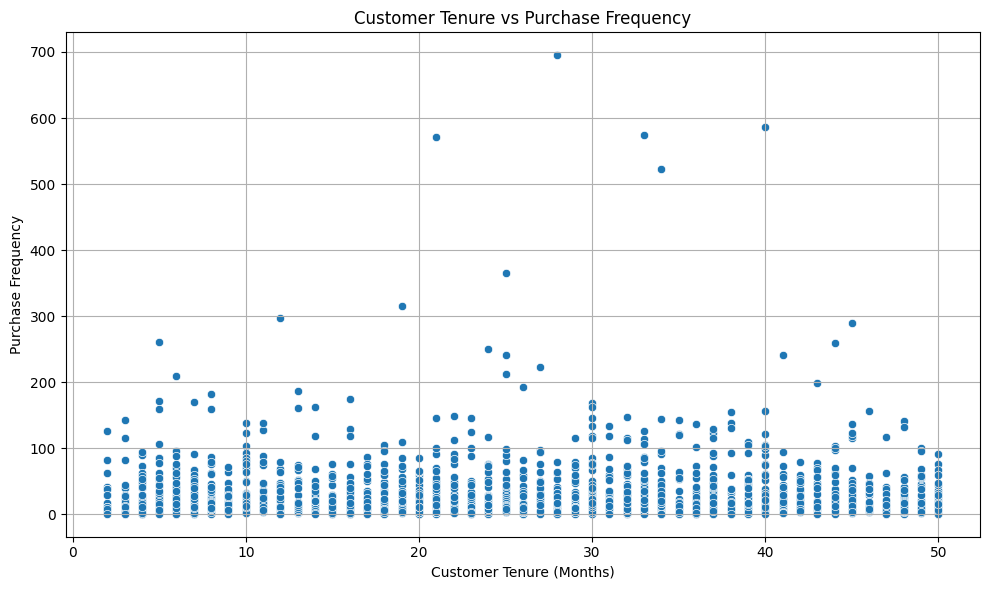

Correlation between Tenure and Purchase Frequency:
0.010963348805442922


In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=purchase_freq, x='Tenure_Months', y='Purchase_Frequency')
plt.title('Customer Tenure vs Purchase Frequency')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation analysis
correlation = purchase_freq.corr()
print("Correlation between Tenure and Purchase Frequency:")
print(correlation['Purchase_Frequency']['Tenure_Months'])

### ***Analyze the relationship between customer tenure and purchase frequency.***

From the scatter plot we can see that for few customers the purchase frequency is quite high and it is directly corelated with the Tenure of the Customer.

But overall the correlation is quite low of the order of 0.01 which shows for the overall population it does not matter much.

### ***How can this insight be used to improve customer engagement and retention strategies?***

### Q17) ***Analyze the relationship between delivery charges and order behavior.***


In [33]:
correlation_quantity = df_online_sales['Delivery_Charges'].corr(df_online_sales['Quantity'])

# Correlation between Delivery_Charges and Order_Amount
correlation_order_amount = df_online_sales['Delivery_Charges'].corr(df_online_sales['Sales_Total'])

print(f"Correlation between Delivery Charges and Quantity: {correlation_quantity:.4f}")
print(f"Correlation between Delivery Charges and Order Amount: {correlation_order_amount:.4f}")



Correlation between Delivery Charges and Quantity: 0.1914
Correlation between Delivery Charges and Order Amount: 0.1833


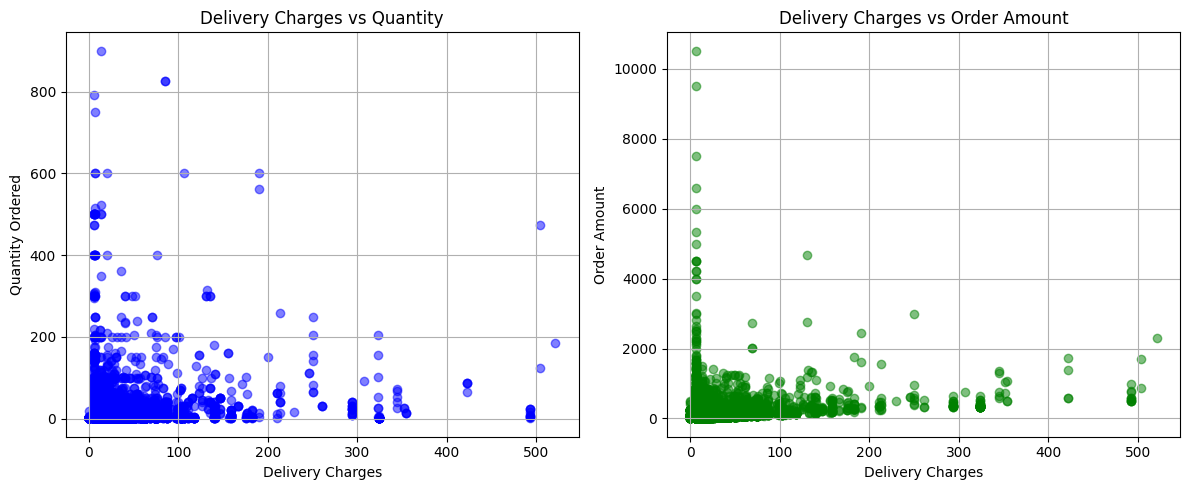

In [34]:
# Plot Delivery Charges vs Quantity
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df_online_sales['Delivery_Charges'], df_online_sales['Quantity'], alpha=0.5, color='blue')
plt.title('Delivery Charges vs Quantity')
plt.xlabel('Delivery Charges')
plt.ylabel('Quantity Ordered')
plt.grid(True)

# Plot Delivery Charges vs Order Amount
plt.subplot(1,2,2)
plt.scatter(df_online_sales['Delivery_Charges'], df_online_sales['Sales_Total'], alpha=0.5, color='green')
plt.title('Delivery Charges vs Order Amount')
plt.xlabel('Delivery Charges')
plt.ylabel('Order Amount')
plt.grid(True)

plt.tight_layout()
plt.show()


In [35]:
# Calculate mean delivery charges
mean_delivery_charge = df_online_sales['Delivery_Charges'].mean()

# Create a new column: High_Charge_Flag
df_online_sales['High_Charge_Flag'] = df_online_sales['Delivery_Charges'] > mean_delivery_charge

# Group by the flag and calculate average Quantity and Order Amount
grouped = df_online_sales.groupby('High_Charge_Flag').agg(
    Avg_Quantity=('Quantity', 'mean'),
    Avg_Order_Amount=('Sales_Total', 'mean'),
    Count=('Transaction_ID', 'count')
).reset_index()

# Map the group labels for better readability
grouped['Charge_Level'] = grouped['High_Charge_Flag'].map({True: 'Above Average', False: 'Below Average'})

print(grouped[['Charge_Level', 'Avg_Quantity', 'Avg_Order_Amount', 'Count']])

    Charge_Level  Avg_Quantity  Avg_Order_Amount  Count
0  Below Average      3.126705         93.815854  43179
1  Above Average     10.572088        120.734213   9745


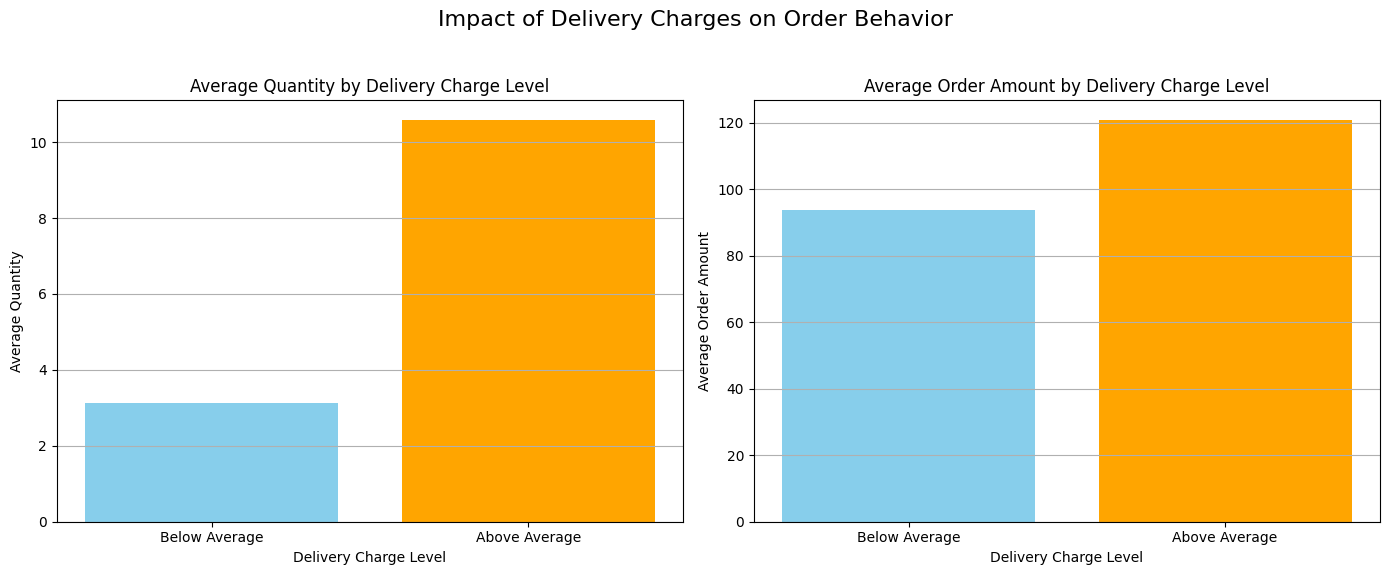

In [36]:
# Create 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Bar plot for Average Quantity
axes[0].bar(grouped['Charge_Level'], grouped['Avg_Quantity'], color=['skyblue', 'orange'])
axes[0].set_title('Average Quantity by Delivery Charge Level')
axes[0].set_ylabel('Average Quantity')
axes[0].set_xlabel('Delivery Charge Level')
axes[0].grid(True, axis='y')

# Bar plot for Average Order Amount
axes[1].bar(grouped['Charge_Level'], grouped['Avg_Order_Amount'], color=['skyblue', 'orange'])
axes[1].set_title('Average Order Amount by Delivery Charge Level')
axes[1].set_ylabel('Average Order Amount')
axes[1].set_xlabel('Delivery Charge Level')
axes[1].grid(True, axis='y')

plt.suptitle('Impact of Delivery Charges on Order Behavior', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### ***Are there opportunities to optimize delivery pricing to increase order quantities or revenue?***

We can see that high charges do impact the Quantity ordered even though the high value products do compensate for the overall Revenue.
But delivery pricing can be adjusted on high value products which can lead to higher sales quantity for these products.

### 18) ***Evaluate how taxes and delivery charges influence customer spending behavior.***
### ***Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?***

In [37]:
tax_amt=pd.read_excel('Tax_amount.xlsx')

print(tax_amt.describe())

online_sales_with_tax=pd.merge(
    df_online_sales,
    tax_amt,
    left_on='Product_Category',
    right_on='Product_Category',
    how='inner'
)
online_sales_with_tax

             GST
count  20.000000
mean    0.116500
std     0.052443
min     0.050000
25%     0.087500
50%     0.100000
75%     0.180000
max     0.180000


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Txn_Dt,Txn_Month,Sales_Total,First_Purchase_Month,Delivery_Bucket,High_Charge_Flag,GST
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01-01,2019-01,160.21,2019-01,Free,False,0.10
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01-01,2019-01,160.21,2019-01,Free,False,0.10
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,2019-01-01,2019-01,8.55,2019-01,Free,False,0.10
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,2019-01-01,2019-01,94.15,2019-01,Free,False,0.18
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,2019-01-01,2019-01,23.00,2019-01,Free,False,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,2019-12-31,2019-12,127.80,2019-12,Free,False,0.10
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,2019-12-31,2019-12,55.42,2019-12,Free,False,0.18
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,2019-12-31,2019-12,158.38,2019-12,Free,False,0.10
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,2019-12-31,2019-12,409.10,2019-12,Free,False,0.10


In [38]:
correlation_quantity = online_sales_with_tax['GST'].corr(online_sales_with_tax['Quantity'])

# Correlation between GST and Order_Amount
correlation_order_amount = online_sales_with_tax['GST'].corr(online_sales_with_tax['Sales_Total'])

print(f"Correlation between GST and Quantity: {correlation_quantity:.4f}")
print(f"Correlation between GST and Order Amount: {correlation_order_amount:.4f}")



Correlation between GST and Quantity: -0.0279
Correlation between GST and Order Amount: -0.3126


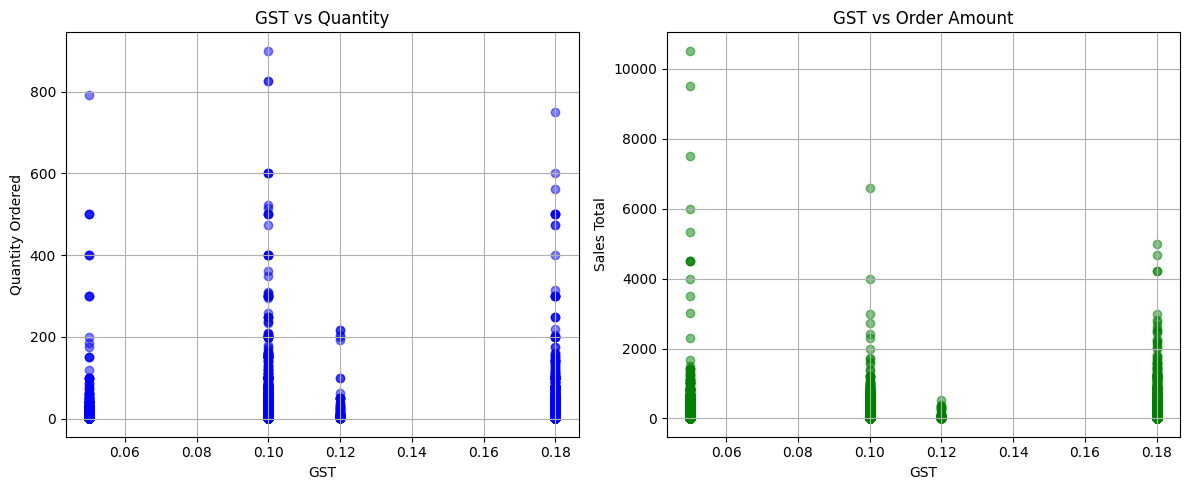

In [39]:
# Plot Delivery Charges vs Quantity
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(online_sales_with_tax['GST'], online_sales_with_tax['Quantity'], alpha=0.5, color='blue')
plt.title('GST vs Quantity')
plt.xlabel('GST')
plt.ylabel('Quantity Ordered')
plt.grid(True)

# Plot Delivery Charges vs Order Amount
plt.subplot(1,2,2)
plt.scatter(online_sales_with_tax['GST'], online_sales_with_tax['Sales_Total'], alpha=0.5, color='green')
plt.title('GST vs Order Amount')
plt.xlabel('GST')
plt.ylabel('Sales Total')
plt.grid(True)

plt.tight_layout()
plt.show()


### Q19) ***Identify seasonal trends in sales by category and location.***


In [40]:
# Group by Product Category and Location, and sum the sales
sales_summary = df_sales_by_cust_demographics.groupby(['Product_Category', 'Location','Txn_Month'])['Sales_Total'].sum().reset_index()

# Sort by Total_Sales descending for better readability
sales_summary_by_category_loc = sales_summary.sort_values(by='Sales_Total', ascending=False)
sales_summary_by_category_loc[sales_summary_by_category_loc['Product_Category']=='Bags'].head(20)

,Product_Category,Location,Txn_Month,Sales_Total
162,Bags,Chicago,2019-03,9784.73
167,Bags,Chicago,2019-08,8661.27
148,Bags,California,2019-01,6745.33
197,Bags,Washington DC,2019-02,6384.85
157,Bags,California,2019-10,6166.30
170,Bags,Chicago,2019-11,5742.12
149,Bags,California,2019-02,5719.95
161,Bags,Chicago,2019-02,5621.76
154,Bags,California,2019-07,5468.81
163,Bags,Chicago,2019-04,5367.79


In [41]:
pivot_table = sales_summary_by_category_loc.pivot_table(
    index=['Txn_Month'],          # Rows = Months
    columns=['Product_Category', 'Location'],  # Columns = Product Category and Location
    values='Sales_Total',
    aggfunc='sum'
)

# Display pivot table
print(pivot_table)

Product_Category Accessories                                            \
Location          California Chicago New Jersey New York Washington DC   
Txn_Month                                                                
2019-01                  NaN   58.07        NaN      NaN           NaN   
2019-02                  NaN     NaN        NaN      NaN           NaN   
2019-03                  NaN   66.49        NaN      NaN           NaN   
2019-04                  NaN   68.98     122.98      NaN           NaN   
2019-05                42.58     NaN      53.34    95.05           NaN   
2019-06               221.14   19.59        NaN    22.99           NaN   
2019-07              1864.25   94.49        NaN      NaN         20.09   
2019-08                72.56  248.92        NaN    68.53           NaN   
2019-09              1225.75  269.52        NaN      NaN           NaN   
2019-10               391.43  452.04      62.52   911.63         19.59   
2019-11              1218.76  882.22  

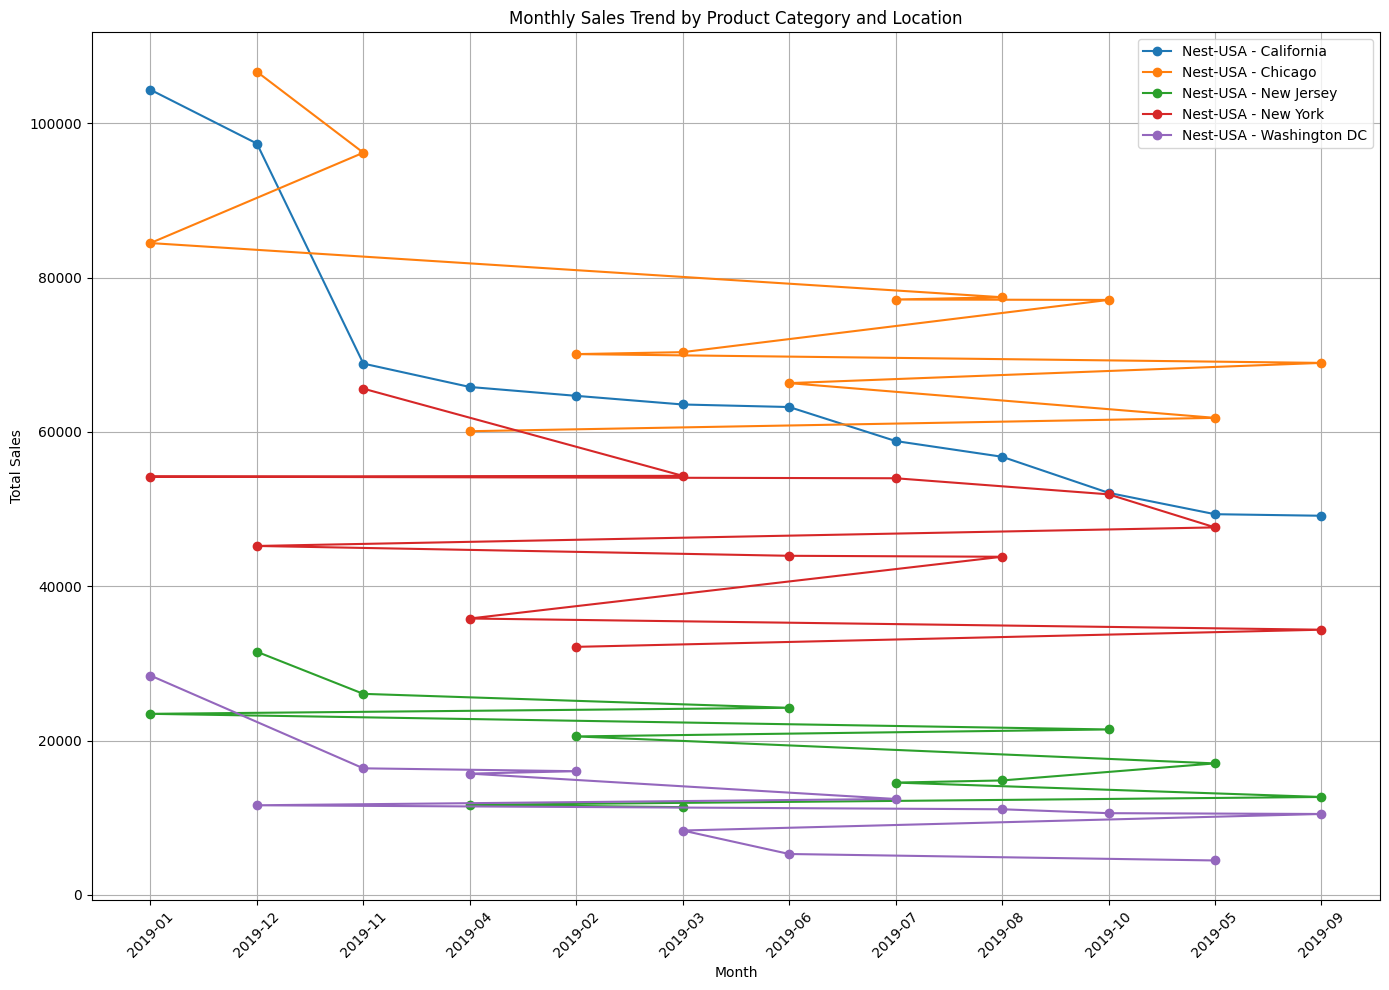

In [42]:
popular_categories = ['Nest-USA']
filtered_sales = sales_summary_by_category_loc[sales_summary_by_category_loc['Product_Category'].isin(popular_categories)]

# Plot
plt.figure(figsize=(14,10))
for (cat, loc), group in filtered_sales.groupby(['Product_Category', 'Location']):
    plt.plot(group['Txn_Month'].astype(str), group['Sales_Total'], marker='o', label=f'{cat} - {loc}')

plt.title('Monthly Sales Trend by Product Category and Location')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***How can the company prepare for peak and off-peak seasons to maximize revenue?***

To maximize revenue across peak and off-peak seasons, a company needs a strategic approach that balances demand forecasting, resource planning, marketing, and customer engagement.

Here are some of the few steps which can be undertaken:
* Use historical sales data and Google Trends to anticipate top-selling products.
* Stock up on high-demand Products to avoid stockouts.
* Offer targeted discounts based on past behaviors (RFM analysis).

### Q20) ***Analyze daily sales trends to identify high-performing and low-performing days.***


In [43]:

online_sales_daily_total=df_online_sales.groupby('Txn_Dt')['Sales_Total'].sum().sort_values(ascending=False)
print(online_sales_daily_total.describe())
online_sales_daily_total.head()


count      365.000000
mean     14321.725178
std       7123.906766
min       1947.640000
25%       9826.790000
50%      13365.700000
75%      17634.570000
max      56590.930000
Name: Sales_Total, dtype: float64


,Sales_Total
Txn_Dt,
2019-04-05,56590.93
2019-11-27,56113.39
2019-04-18,48930.24
2019-08-02,41864.69
2019-07-18,40022.75


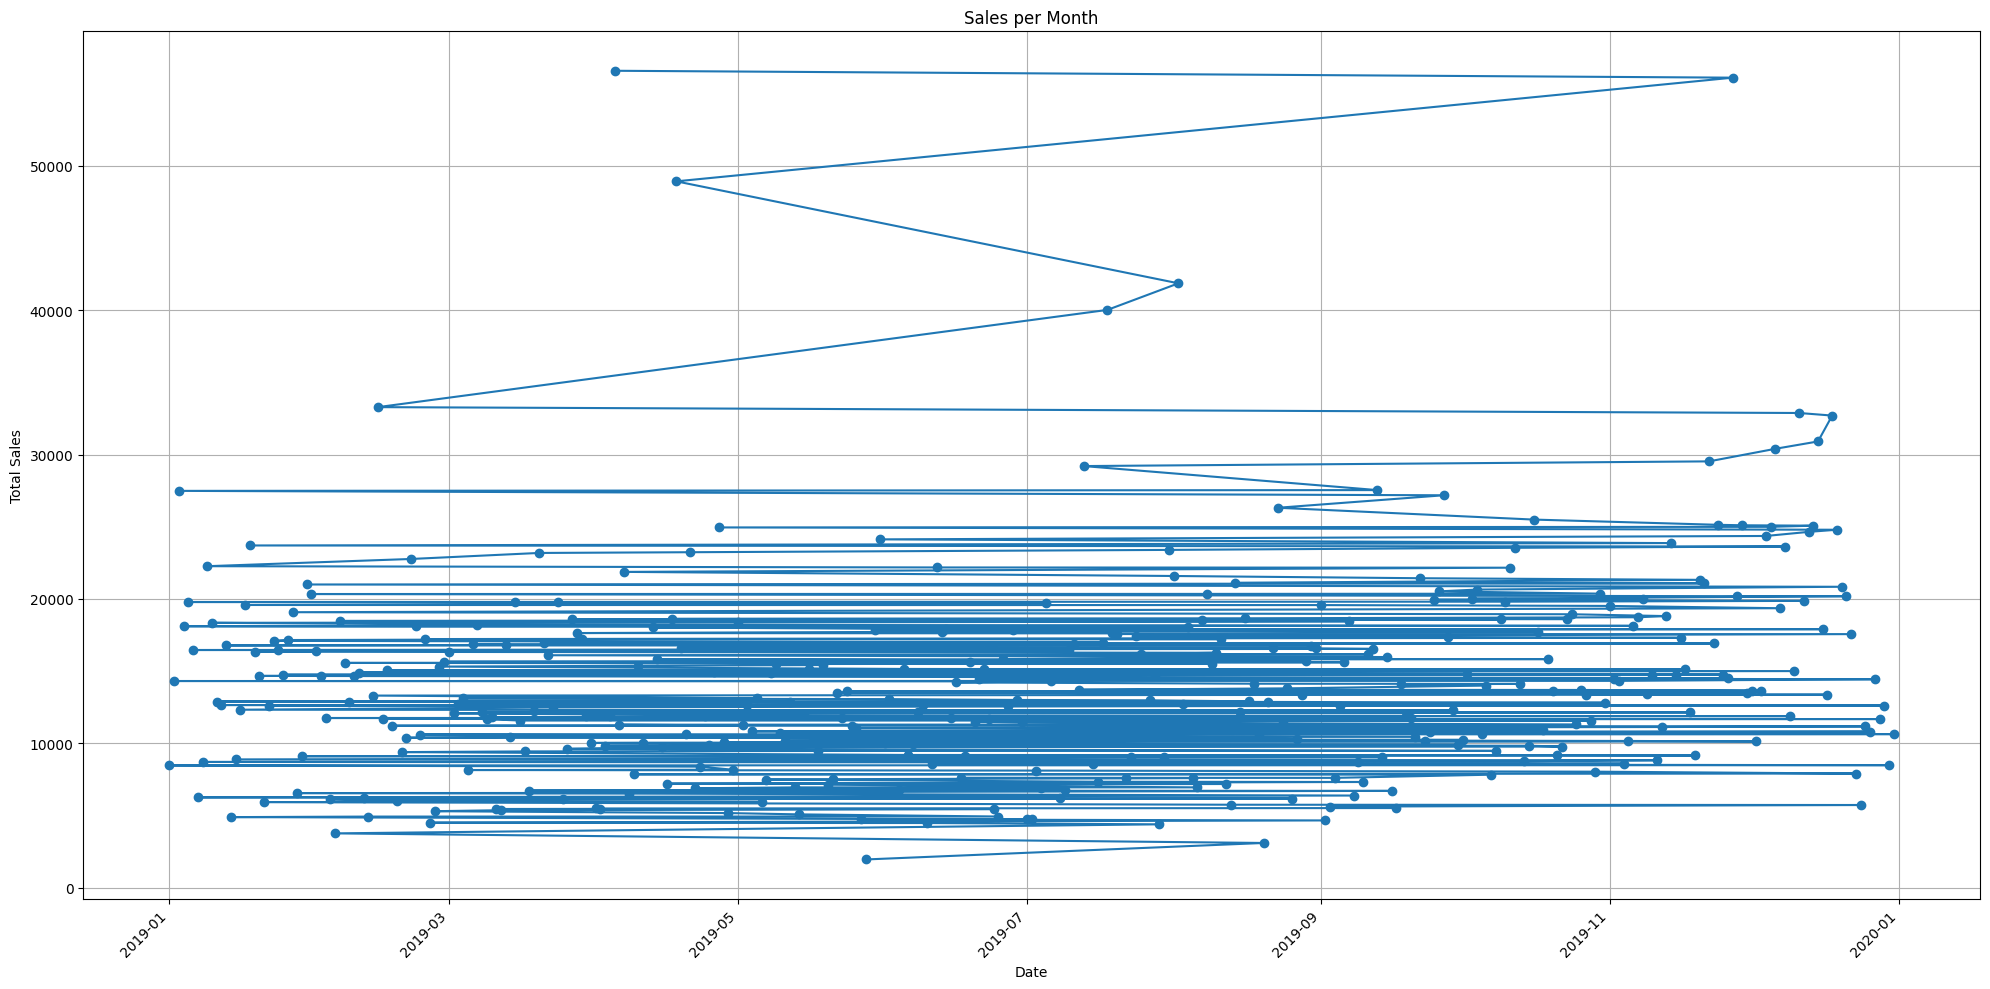

In [44]:
# Plot the sales trend
plt.figure(figsize=(20,10))
online_sales_daily_total.plot(kind='line', marker='o')
plt.title('Sales per Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
mkt_spend=pd.read_csv('Marketing_Spend.csv')
mkt_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


###  ***What strategies can be implemented to boost sales on slower days.***

To boost sales on slower days, the company can adopt a mix of tactical promotions, behavioral nudges, and operational tweaks as follows:

* Flash Sales: Create urgency by running discounts for a few hours or a single day.
* Segment-Based Emails: Send tailored offers based on browsing or purchase history.
* Tiered Discounts: “Spend ₹1000, get 10% off; Spend ₹2000, get 20% off.”
* Gamified Discounts: Scratch cards, spin-the-wheel, or mystery coupons on slower days.


